In [312]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Data Cleaning 

### Data Reading & Data Types 

In [313]:
#Read the data in pandas
inp0= pd.read_csv("Attribute+DataSet.csv")
inp1= pd.read_csv("Dress+Sales.csv")

In [247]:
print(inp0.head())
print(inp1.head())

     Dress_ID    Style    Price  Rating Size  Season NeckLine SleeveLength   
0  1006032852     Sexy      Low     4.6    M  Summer   o-neck    sleevless  \
1  1212192089   Casual      Low     0.0    L  Summer   o-neck        Petal   
2  1190380701  vintage     High     0.0    L  Automn   o-neck         full   
3   966005983    Brief  Average     4.6    L  Spring   o-neck         full   
4   876339541     cute      Low     4.5    M  Summer   o-neck    butterfly   

        Material FabricType  Decoration Pattern Type  Recommendation  
0            NaN    chiffon     ruffles       animal               1  
1     microfiber        NaN     ruffles       animal               0  
2       polyster        NaN         NaN        print               0  
3           silk    chiffon  embroidary        print               1  
4  chiffonfabric    chiffon         bow          dot               0  
       Dress_ID  29-08-2013  31-08-2013  09-02-2013  09-04-2013  09-06-2013   
0  1.006033e+09        211

You have “Attribute DataSet” which contains a column named “Price”. Choose the correct statement from the following about its data type and variable type.
- Integer type and numerical variable
- Object type and categorical ordinal variable
- Object type and categorical nominal variable
- Float type and categorical variable.


ans: Object type and categorical ordinal variable

In [248]:
inp0.Price.describe()

count         477
unique          5
top       Average
freq          240
Name: Price, dtype: object

There is another column in “Attribute DataSet” named as “Recommendation”, choose the correct statement about its data type and variable type.
- Integer type and categorical
- Object type and categorical
- Integer type and continuous numerical
- Object type only.


ans : integer type and categorical

In [64]:
inp0["Recommendation"].value_counts()

Recommendation
0    274
1    205
Name: count, dtype: int64

Which of the following column do you think are of no use in “Attribute DataSet”.
- Dress_ID
- Price
- Size and material
- NeckLine
- None of the above


ans: None of the above

In [13]:
# print(inp0.columns)
# print(inp0.Dress_ID.value_counts())
# print(inp0.NeckLine.value_counts())

NeckLine
o-neck             257
v-neck             119
slash-neck          25
boat-neck           18
Sweetheart          14
turndowncollor      13
bowneck             10
peterpan-collor      5
sqare-collor         5
open                 3
Scoop                2
ruffled              1
mandarin-collor      1
sweetheart           1
halter               1
backless             1
Name: count, dtype: int64


In [65]:
# Print the information about the attributes of inp0 and inp1.
print(inp0.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        479 non-null    int64  
 1   Style           479 non-null    object 
 2   Price           477 non-null    object 
 3   Rating          479 non-null    float64
 4   Size            479 non-null    object 
 5   Season          477 non-null    object 
 6   NeckLine        476 non-null    object 
 7   SleeveLength    477 non-null    object 
 8   Material        360 non-null    object 
 9   FabricType      223 non-null    object 
 10  Decoration      255 non-null    object 
 11  Pattern Type    377 non-null    object 
 12  Recommendation  479 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 48.8+ KB
None


In [18]:
print(inp1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

### Fixing the Rows and Columns 

As you can see, there is a column in “Attribute Dataset” named as ‘Size’. This column contains the values in abbreviation format. Write a code in Python to convert the followings:

- M into  “Medium”
- L into  “Large”
- XL into “Extra large”
- free into “Free”
- S, s & small into “Small”.

Now once you are done with changes in the dataset, what is the value of the lowest percentage, the highest percentage and the percentage of Small size categories in the column named “Size”?


In [66]:
inp0.Size.value_counts()

Size
M        171
free     165
L         93
S         34
XL        14
small      1
s          1
Name: count, dtype: int64

In [314]:
# Column fixing, correcting size abbreviation. count the percentage of each size category in "Size" column.
def clean_size(x):
    if x == 'M':
        return 'Medium'
    elif x == 'free':
        return 'Free'
    elif x == 'L':
        return 'Large'
    elif x == 'XL':
        return 'Extra large'
    elif x in ['s', 'S', 'small']:
        return 'Small'

inp0.Size = inp0.Size.apply(clean_size)

In [315]:
# Print the value counts of each category in "Size" column.
inp0.Size.value_counts()

Size
Medium         171
Free           165
Large           93
Small           36
Extra large     14
Name: count, dtype: int64

In [74]:
inp0.Size.value_counts(normalize=True)*100

Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra large     2.922756
Name: proportion, dtype: float64

ans: 2.9%, 35.7%, 7.5%

In [73]:
inp0.Size.value_counts(normalize=True)*100

Size
Medium         35.699374
Free           34.446764
Large          19.415449
Small           7.515658
Extra large     2.922756
Name: proportion, dtype: float64

### Impute/Remove Missing values

In [75]:
# Print the null count of each variables of inp0 and inp1.
for name in inp0.columns:
    print( name,":",inp0[name].isnull().sum()*100/(inp0.shape[0]))


Dress_ID : 0.0
Style : 0.0
Price : 0.4175365344467641
Rating : 0.0
Size : 0.0
Season : 0.4175365344467641
NeckLine : 0.6263048016701461
SleeveLength : 0.4175365344467641
Material : 24.843423799582464
FabricType : 53.4446764091858
Decoration : 46.76409185803758
Pattern Type : 21.29436325678497
Recommendation : 0.0


In [76]:

for name in inp1.columns:
    # print(name, type(name))
    print( name,":",inp1[name].isnull().sum()*100/(inp0.shape[0]))

Dress_ID : 0.0
29-08-2013 : 0.0
31-08-2013 : 0.0
09-02-2013 : 0.0
09-04-2013 : 0.0
09-06-2013 : 0.0
09-08-2013 : 0.0
09-10-2013 : 0.0
09-12-2013 : 0.0
14-09-2013 : 0.0
16-09-2013 : 0.0
18-09-2013 : 0.0
20-09-2013 : 0.0
22-09-2013 : 0.0
24-09-2013 : 0.0
26-09-2013 : 46.34655532359081
28-09-2013 : 0.0
30-09-2013 : 53.65344467640919
10-02-2013 : 54.07098121085595
10-04-2013 : 53.86221294363257
10-06-2013 : 0.0
10-08-2013 : 53.23590814196242
10-10-2013 : 53.23590814196242
10-12-2013 : 0.0


You are given another dataset named “Dress Sales”. Now if you observe the datatypes of the columns using ‘inp1.info()’ command, you can identify that there are certain columns defined as object data type though they primarily consist of numeric data.

Now if you try and convert these object data type columns into numeric data type(float), you will come across an error message. Try to correct this error.







In [77]:
# Print the data types information of inp1 i.e. "Dress Sales" data.
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  479 non-null    object 
 9   14-09-2013  479 non-null    object 
 10  16-09-2013  479 non-null    object 
 11  18-09-2013  479 non-null    object 
 12  20-09-2013  479 non-null    object 
 13  22-09-2013  479 non-null    object 
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

In [98]:
# Try to convert the object type into float type of data. YOU GET ERROR MESSAGE.
# inp1['09-12-2013'] = inp1['09-12-2013'].astype('float64')
inp1['09-12-2013'].astype('Float64')

ValueError: could not convert string to float: 'Removed'

ans: Error occurred because there are string entries in such columns. You should replace these string values with null values and then convert it into float type.

In [316]:
# Do the required changes in the "Dress Sales" data set to get null values on string values.
inp1.loc[inp1['09-12-2013']== 'Removed',"09-12-2013"] = np.NaN

inp1.loc[inp1['14-09-2013']== 'removed',"14-09-2013"] = np.NaN

inp1.loc[inp1['16-09-2013']== 'removed',"16-09-2013"] = np.NaN

inp1.loc[inp1['18-09-2013']== 'removed',"18-09-2013"] = np.NaN

inp1.loc[inp1['20-09-2013']== 'removed',"20-09-2013"] = np.NaN

inp1.loc[inp1['22-09-2013']== 'Orders',"22-09-2013"] = np.NaN

In [317]:
# Convert the object type columns in "Dress Sales" into float type of data type.

inp1['09-12-2013'] = inp1['09-12-2013'].astype(float)
inp1['14-09-2013'] = inp1['14-09-2013'].astype(float)
inp1['16-09-2013'] = inp1['16-09-2013'].astype(float)
inp1['18-09-2013'] = inp1['18-09-2013'].astype(float)
inp1['20-09-2013'] = inp1['20-09-2013'].astype(float)
inp1['22-09-2013'] = inp1['22-09-2013'].astype(float)

inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dress_ID    479 non-null    float64
 1   29-08-2013  479 non-null    int64  
 2   31-08-2013  479 non-null    int64  
 3   09-02-2013  479 non-null    int64  
 4   09-04-2013  479 non-null    int64  
 5   09-06-2013  479 non-null    int64  
 6   09-08-2013  479 non-null    int64  
 7   09-10-2013  479 non-null    int64  
 8   09-12-2013  478 non-null    float64
 9   14-09-2013  478 non-null    float64
 10  16-09-2013  478 non-null    float64
 11  18-09-2013  478 non-null    float64
 12  20-09-2013  478 non-null    float64
 13  22-09-2013  478 non-null    float64
 14  24-09-2013  479 non-null    int64  
 15  26-09-2013  257 non-null    float64
 16  28-09-2013  479 non-null    int64  
 17  30-09-2013  222 non-null    float64
 18  10-02-2013  220 non-null    float64
 19  10-04-2013  221 non-null    f

When you see the null counts in “Dress Sales” dataset after performing all the operations that have been mentioned in jupyter notebook, you will find that there are some columns in “Dress Sales” data where there are more than 40% of missing values. Based on your understanding of dealing with missing values do the following steps.

ans:These columns can be removed because they have a huge number of missing values. Moreover, if you see, the number of sales (numerical values) in such columns is not so high as compared to other Date columns. Hence, it is safe to remove such columns.

In [115]:
# Print the null percetange of each column of inp1.
for name in inp1.columns:
    # print(name, type(name))
    print( name,":",inp1[name].isnull().sum()*100/(inp0.shape[0]))

Dress_ID : 0.0
29-08-2013 : 0.0
31-08-2013 : 0.0
09-02-2013 : 0.0
09-04-2013 : 0.0
09-06-2013 : 0.0
09-08-2013 : 0.0
09-10-2013 : 0.0
09-12-2013 : 0.20876826722338204
14-09-2013 : 0.20876826722338204
16-09-2013 : 0.20876826722338204
18-09-2013 : 0.20876826722338204
20-09-2013 : 0.20876826722338204
22-09-2013 : 0.20876826722338204
24-09-2013 : 0.0
26-09-2013 : 46.34655532359081
28-09-2013 : 0.0
30-09-2013 : 53.65344467640919
10-02-2013 : 54.07098121085595
10-04-2013 : 53.86221294363257
10-06-2013 : 0.0
10-08-2013 : 53.23590814196242
10-10-2013 : 53.23590814196242
10-12-2013 : 0.0


In [318]:
# Drop the columns in "Dress Sales" which have more than 40% of missing values.
for name in inp1.columns:
    miss_percent = inp1[name].isnull().sum()*100/(inp0.shape[0])
    if miss_percent > 40:
        print(name)
        inp1 = inp1.drop(columns=name)

26-09-2013
30-09-2013
10-02-2013
10-04-2013
10-08-2013
10-10-2013


In [321]:
# Print the null percetange of each column of inp1.
count = 0
for name in inp1.columns:
    # print(name, type(name))
    print( name,":",inp1[name].isnull().sum()*100/(inp0.shape[0]))
    count+= 1
print(count)

Dress_ID : 0.0
29-08-2013 : 0.0
31-08-2013 : 0.0
09-02-2013 : 0.0
09-04-2013 : 0.0
09-06-2013 : 0.0
09-08-2013 : 0.0
09-10-2013 : 0.0
09-12-2013 : 0.20876826722338204
14-09-2013 : 0.20876826722338204
16-09-2013 : 0.20876826722338204
18-09-2013 : 0.20876826722338204
20-09-2013 : 0.20876826722338204
22-09-2013 : 0.20876826722338204
24-09-2013 : 0.0
28-09-2013 : 0.0
10-06-2013 : 0.0
10-12-2013 : 0.0
18


You should categorise the dates into seasons in “Dress Sales” data to simplify the analysis according to the following criteria:
- June, July and August: Summer.
- September, October and November: Autumn.
- December, January and February: WInter.
- March, April and May: Spring.




In [322]:
# Create the four seasons columns in inp1, according to the above criteria.
inp1['Summer'] = inp1['09-06-2013']+inp1['10-06-2013'] + inp1['29-08-2013'] + inp1['31-08-2013'] + inp1['09-08-2013']
inp1['Autumn'] = inp1['14-09-2013']+inp1['16-09-2013']+inp1['18-09-2013']+inp1['20-09-2013']+inp1['22-09-2013']+inp1['24-09-2013']+inp1['28-09-2013'] + inp1['09-10-2013']
inp1['Winter'] = inp1['09-12-2013'] + inp1['10-12-2013'] + inp1['09-02-2013']
inp1['Spring'] = inp1['09-04-2013']


In [326]:
# calculate the sum of sales in each seasons in inp1 i.e. "Dress Sales".
print( "Summer:",inp1.Summer.sum())
print( "Autumn:",inp1.Autumn.sum())
print( "Winter:",inp1.Winter.sum())
print( "Spring:",inp1.Spring.sum())

Summer: 691907
Autumn: 1353543.0
Winter: 473640.0
Spring: 143600


ans: Spring, 143600

Now let's merge inp1 with inp0 with left join manner, so that the information of inp0 should remain intact.

In [327]:
# Merge inp0 with inp1 into inp0. this is also called left merge.
inp0 = pd.merge(left=inp0,right=inp1, how='left', left_on='Dress_ID', right_on='Dress_ID')
inp0.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,Material,FabricType,...,20-09-2013,22-09-2013,24-09-2013,28-09-2013,10-06-2013,10-12-2013,Summer,Autumn,Winter,Spring
0,1006032852,Sexy,Low,4.6,Medium,Summer,o-neck,sleevless,NaN,chiffon,...,3386.0,3479.0,3554,3706,3897,4048,13899,26857.0,9658.0,2660
1,1212192089,Casual,Low,0.0,Large,Summer,o-neck,Petal,microfiber,NaN,...,2106.0,2454.0,2710,3258,3911,4277,6216,17311.0,6405.0,750
2,1190380701,vintage,High,0.0,Large,Automn,o-neck,full,polyster,NaN,...,10.0,11.0,11,11,11,11,40,82.0,28.0,7
3,966005983,Brief,Average,4.6,Large,Spring,o-neck,full,silk,chiffon,...,1812.0,1845.0,1878,1914,1952,1963,7213,14411.0,5012.0,1455
4,876339541,cute,Low,4.5,Medium,Summer,o-neck,butterfly,chiffonfabric,chiffon,...,1824.0,1919.0,2032,2252,2544,2736,7706,14676.0,5678.0,1396


In [328]:
# Now Drop the Date columns from inp0 as it is already combined into four seasons.
inp0.drop(inp0.loc[:,'29-08-2013':'10-12-2013'].columns, axis= 1, inplace= True)
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

Print the null count of inp0 to get the idea about the missing values in data set.

In [329]:
# Print the null count of each columns in inp0 dataframe i.e. combined data frame of inp0 and inp1 without date columns.
inp0.isnull().sum()

Dress_ID            0
Style               0
Price               2
Rating              0
Size                0
Season              2
NeckLine            3
SleeveLength        2
Material          119
FabricType        256
Decoration        224
Pattern Type      102
Recommendation      0
Summer              0
Autumn              2
Winter              1
Spring              0
dtype: int64

You can see that there are two types of variables one with a large number of missing values and another is very less number of missing values. These two columns can be categorized as:

Type-1: Missing values are very less (around 2 or 3 missing values): Price, Season, NeckLine, SleeveLength, Winter and Autumn. 

Type-2: Missing values are large in numbers (more than 15%): Material, FabricType, Decoration and Pattern Type.



ans:You should create a separate category named as Missing category in Type-2 columns and just drop the missing values of Type-1 columns.

In [330]:
# Deal with the missing values of Type-1 columns: Price, Season, NeckLine, SleeveLength, Winter and Autumn.
# Drop the missing values of Type-1 columns:
inp0 = inp0[~inp0.Price.isnull()]

inp0 = inp0[~inp0.Season.isnull()]

inp0 = inp0[~inp0.NeckLine.isnull()]

inp0 = inp0[~inp0.SleeveLength.isnull()]

inp1 = inp1[~inp1.Winter.isnull()]

inp1 = inp1[~inp1.Autumn.isnull()]

In [331]:
# Deal with the missing values for Type-2 columns: Material, FabricType, Decoration and Pattern Type.
#Create a separate category ‘Missing’ in Type-2 column:

inp0.Material= inp0.Material.replace(np.nan, "Missing")

inp0.FabricType= inp0.FabricType.replace(np.nan, "Missing")

inp0.Decoration= inp0.Decoration.replace(np.nan, "Missing")

inp0['Pattern Type']= inp0['Pattern Type'].replace(np.nan, "Missing")

### Standardise value 

In the given dataset, there are certain discrepancies with the categorical names such as irregular spellings. Choose the correct option of columns with irregular categories and update them.
 
- Season, NeckLine
- Price, Material
- fabricType, Decoration
- Season, SleeveLength


In [332]:
#correcting the spellings.
inp0.Season.value_counts()

Season
Summer    151
Spring    116
Winter     93
Automn     59
winter     44
Autumn      7
spring      2
Name: count, dtype: int64

In [333]:

#correcting the season spellings.

inp0.Season= inp0.Season.replace('Automn', "Autumn")

inp0.Season= inp0.Season.replace('spring', "Spring")

inp0.Season= inp0.Season.replace('winter', "Winter")

In [334]:
inp0.NeckLine.value_counts()

NeckLine
o-neck             255
v-neck             118
slash-neck          25
boat-neck           18
turndowncollor      13
Sweetheart          13
bowneck             10
peterpan-collor      5
sqare-collor         5
open                 3
Scoop                2
ruffled              1
mandarin-collor      1
sweetheart           1
halter               1
backless             1
Name: count, dtype: int64

In [335]:
inp0.SleeveLength.value_counts()

SleeveLength
sleevless         213
full               92
short              92
halfsleeve         32
threequarter       17
thressqatar         8
sleeveless          4
capsleeves          3
sleeevless          2
cap-sleeves         2
urndowncollor       1
half                1
turndowncollor      1
threequater         1
Petal               1
butterfly           1
sleveless           1
Name: count, dtype: int64

ans:Season, SleeveLength

In [336]:
#correcting the Spellings.
#correcting the SleeveLength.

inp0.SleeveLength= inp0.SleeveLength.replace(['cap-sleeves', 'capsleeves'], "cap sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace('full', "full sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['half','halfsleeve'], "half sleeves")

inp0.SleeveLength= inp0.SleeveLength.replace(['sleevless', 'sleeevless', 'sleeveless', 'sleveless'], "sleeve less")

inp0.SleeveLength= inp0.SleeveLength.replace(['threequarter','threequater', 'thressqatar'], "three quater")

inp0.SleeveLength= inp0.SleeveLength.replace(['turndowncollor','urndowncollor'], "turn down collar")

## Univariate Analysis 

### Categorical Unordered Univariate Analysis
 

There is a column named ‘Style’ in ‘Attribute Dataset’ which consists of the different style categories of the women apparels. Certain categories whose total sale is less than 50000 across all the seasons is considered under one single category as ‘Others’.


Which of the following categories in ‘Style’ column can be grouped into ‘Others’ category? and perform the grouping operation in the notebook for further analysis.
- Flare, fashion
- Novelty, bohemian
- OL, fashion, work
- Novelty, fashion, Flare


ans:
Flare, Fashion
Novelty, fashion,flare

In [337]:
# Group "Style" categories into "Others" which have less than 50000 sales across all the seasons.
# inp0.Style.value_counts()
total_style = inp0.groupby(by='Style')[['Summer','Autumn', 'Winter', 'Spring']].sum()
total_style.sum(axis=1)


Style
Brief        139628.0
Casual      1103558.0
Flare          2089.0
Novelty       13286.0
OL              289.0
Sexy         452355.0
bohemian      69117.0
cute         361999.0
fashion         395.0
party        142041.0
sexy          85914.0
vintage      180574.0
work          93095.0
dtype: float64

In [338]:
inp0.replace(total_style[total_style.sum(axis=1)<50000].index, 'Others', inplace=True)

In [339]:
inp0.Style.value_counts(normalize=True)*100

Style
Casual      45.974576
Sexy        13.771186
party       10.169492
cute         9.110169
vintage      5.296610
bohemian     4.872881
Brief        3.601695
work         3.601695
Others       2.118644
sexy         1.483051
Name: proportion, dtype: float64

What is the percentage of “cute” and “Others” category in “Style” column in “Attribute DataSet” respectively?
- 46%, 5%
- 9%, 2.1%
- 2.1%, 5%
- 13.8%, 9%


ans: 9 and 2.1

In [340]:
# Calculate the percentage of each categories in the "Style" variable.
inp0.Style.value_counts(normalize=True)*100

Style
Casual      45.974576
Sexy        13.771186
party       10.169492
cute         9.110169
vintage      5.296610
bohemian     4.872881
Brief        3.601695
work         3.601695
Others       2.118644
sexy         1.483051
Name: proportion, dtype: float64

Similarly Club Neckline, SLeeve length categories into "Others" which have less than 50000 sales across all the seasons.

In [341]:
# Group "Neckline" categories into "Others" which have less than 50000 sales across all the seasons.
total_neck = inp0.groupby(by='NeckLine')[['Summer','Autumn', 'Winter', 'Spring']].sum()
total_neck.sum(axis=1)


NeckLine
Scoop                 3135.0
Sweetheart           14588.0
backless              2888.0
boat-neck            53049.0
bowneck              21633.0
halter                2355.0
mandarin-collor        289.0
o-neck             1671102.0
open                  7396.0
peterpan-collor      18908.0
ruffled             118871.0
slash-neck           68396.0
sqare-collor         32395.0
sweetheart            2728.0
turndowncollor       68496.0
v-neck              558111.0
dtype: float64

In [342]:
inp0.replace(total_neck[total_neck.sum(axis=1)<50000].index, 'Others', inplace=True)

In [343]:
# Group "Sleeve length" categories into "Others" which have less than 50000 sales across all the seasons.
total_sleeve = inp0.groupby(by='SleeveLength')[['Summer','Autumn', 'Winter', 'Spring']].sum()
print(total_sleeve.sum(axis=1))
inp0.replace(total_sleeve[total_sleeve.sum(axis=1)<50000].index, 'Others', inplace=True)

SleeveLength
Petal                30682.0
butterfly            29456.0
cap sleeves          13603.0
full sleeves        463965.0
half sleeves        207843.0
short               696130.0
sleeve less         965535.0
three quater        233543.0
turn down collar      3583.0
dtype: float64


Club material, fabrictype, patterntype and decoration categories into "Others" which have less than 25000 sales across all the seasons

In [344]:
# Group "material" categories into "Others" which have less than 25000 sales across all the seasons.
total_mat = inp0.groupby(by='Material')[['Summer','Autumn', 'Winter', 'Spring']].sum()
inp0.replace(total_mat[total_mat.sum(axis=1)<25000].index, 'Others', inplace=True)

In [349]:
print(total_mat.sum(axis=1))

Material
Missing          663212.0
acrylic           12155.0
cashmere           5667.0
chiffonfabric    333284.0
cotton           727417.0
lace               6296.0
linen             20149.0
lycra             12555.0
microfiber        31817.0
milksilk          33710.0
mix               68490.0
modal               522.0
model               245.0
nylon             29483.0
other              5458.0
polyster         496350.0
rayon             65208.0
shiffon            8295.0
silk              93867.0
sill               2719.0
spandex           22402.0
viscos             4180.0
wool                859.0
dtype: float64


In [350]:
# Group "fabric type" categories into "Others" which have less than 25000 sales across all the seasons.
total_fab = inp0.groupby(by='FabricType')[['Summer','Autumn', 'Winter', 'Spring']].sum()
inp0.replace(total_fab[total_fab.sum(axis=1)<25000].index, 'Others', inplace=True)
total_fab.sum(axis=1)

FabricType
Corduroy        10866.0
Missing       1217947.0
Others          30819.0
batik            4021.0
broadcloth     119998.0
chiffon        999160.0
dobby            2761.0
flannael         6835.0
flannel         14733.0
jersey         119952.0
knitted            14.0
knitting           39.0
organza           762.0
poplin           1443.0
satin           11403.0
sattin           9673.0
terry             373.0
tulle            2119.0
wollen           2858.0
woolen           8471.0
worsted         80093.0
dtype: float64

In [351]:
# Group "patern type" categories into "Others" which have less than 25000 sales across all the seasons.
total_pat = inp0.groupby(by='Pattern Type')[['Summer','Autumn', 'Winter', 'Spring']].sum()
inp0.replace(total_pat[total_pat.sum(axis=1)<25000].index, 'Others', inplace=True)
total_pat.sum(axis=1)

Pattern Type
Missing       247682.0
animal        211273.0
character       3738.0
dot           245091.0
floral         10614.0
geometric     114335.0
leapord         3017.0
leopard        25267.0
none            5991.0
patchwork     190360.0
plaid           1369.0
print         403025.0
solid        1115521.0
splice          5112.0
striped        61945.0
dtype: float64

In [352]:
# Group "decoration" categories into "Others" which have less than 25000 sales across all the seasons.
total_dec = inp0.groupby(by='Decoration')[['Summer','Autumn', 'Winter', 'Spring']].sum()
inp0.replace(total_dec[total_dec.sum(axis=1)<25000].index, 'Others', inplace=True)
total_dec.sum(axis=1)

Decoration
Missing       1084474.0
Others         428139.0
Tiered          22147.0
applique        67873.0
beading         57382.0
bow            255359.0
button          22203.0
cascading         210.0
crystal          6450.0
draped           7099.0
embroidary      41868.0
feathers           64.0
flowers          6676.0
hollowout       67758.0
pearls             41.0
plain            2740.0
pockets         21532.0
rivet           17801.0
ruched           7940.0
ruffles        191187.0
sashes         285759.0
sequined        48699.0
tassel            939.0
dtype: float64

### Caregorical Ordered Univariate Analysis

Which of the following is an unordered variable in “Attribute DataSet”.
- Style
- Price
- Season
- Size


In [ ]:
ans: Style

### Numerical variable Univariate analysis:

What is the approximate difference between the maximum value and 75th percentile in “Autumn” column.
- Approx 54000
- Approx 55000
- Approx 52000
- Approx 50000



ans ~ 52000

In [353]:
# Describe the numerical variale: "Autumn".
inp0.Autumn.describe()['75%'] - inp0.Autumn.describe().max()

-52406.0

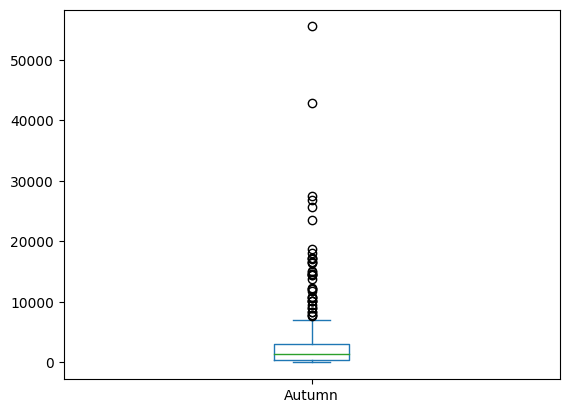

In [354]:
# plot the boxplot of "Autumn" column.
inp0.Autumn.plot.box()
plt.show()

Which of the following season has the highest difference between the maximum value and 99th quantile of sales?
- Winter
- Summer
- Spring
- Autumn


ans: autumn (based on the below box plot)

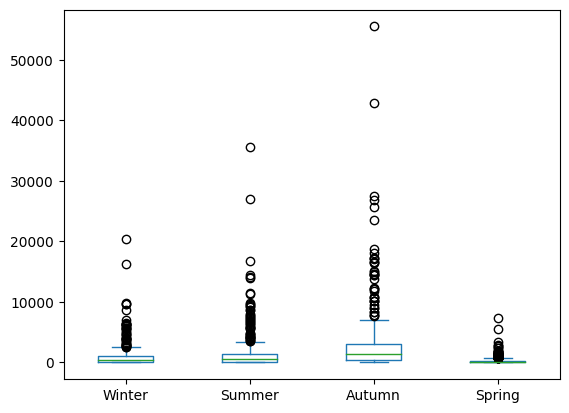

In [356]:
inp0[["Winter","Summer","Autumn","Spring"]].plot.box()
plt.show()

In [359]:
# Find the maximum and 99th percentile of Winter season.
# inp0.Winter.describe()
inp0.Winter.quantile(1)  - inp0.Winter.quantile(.99) 

11412.30999999998

In [364]:
# Find the maximum and 99th percentile of Summer season.
inp0.Summer.quantile(1) - inp0.Summer.quantile(.99) 

21605.499999999993

In [365]:
# Find the maximum and 99th percentile of Spring season.
inp0.Spring.quantile(1) - inp0.Spring.quantile(.99) 

4716.84

In [363]:
# Find the maximum and 99th percentile of Autumn season.
inp0.Autumn.quantile(1) - inp0.Autumn.quantile(.99)

31397.999999999975

## Bivariate Analysis 

### Numerical- Categorical analysis

Which of the following “Price” category has the lowest average value of rating?
- very-high
- Medium
- Low
- High


In [367]:
# Find the Mean of Ratings for each Price category.
inp0.groupby(by='Price')['Rating'].mean()

Price
Average      3.455042
High         2.914286
Low          3.731481
Medium       3.156667
very-high    3.123810
Name: Rating, dtype: float64

ans: High

What is the median of the rating of “vintage” category in Style column?
- 4.6
- 4.7
- 4.55
- 0.00


In [368]:
# Find the median of Ratings for each Style category.
inp0.groupby(by='Style')['Rating'].median()

Style
Brief       4.6
Casual      4.6
Others      0.0
Sexy        4.6
bohemian    4.6
cute        4.6
party       4.7
sexy        4.5
vintage     4.6
work        4.7
Name: Rating, dtype: float64

ans: 4.6

Which of the following season has the highest average value of sale for “Recommendation” value equals to 1.
- Summer
- Spring
- Autumn
- Winter


In [383]:
inp0.groupby(by='Recommendation')[['Summer','Winter','Autumn','Spring']].mean()

,Summer,Winter,Autumn,Spring
Recommendation,,,,
0,1433.547794,987.654412,2841.720588,298.209559
1,1486.295000,1011.695000,2868.060302,306.850000


ans: Autumn

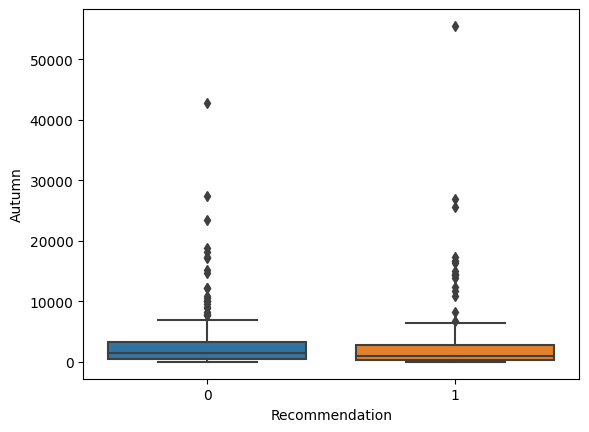

In [384]:
sns.boxplot(x=inp0["Recommendation"],y=inp0["Autumn"])

plt.show()

In [378]:
# Summer sale vs Recommendation.
inp0.groupby(by='Recommendation')[['Summer']].mean()

,Summer
Recommendation,
0,1433.547794
1,1486.295000


In [379]:
# Spring sale vs Recommendation.
inp0.groupby(by='Recommendation')[['Spring']].mean()

,Spring
Recommendation,
0,298.209559
1,306.850000


In [380]:
# Autumn sale vs Recommendation.
inp0.groupby(by='Recommendation')[['Autumn']].mean()

,Autumn
Recommendation,
0,2841.720588
1,2868.060302


In [381]:
# Winter sale vs Recommendation.
inp0.groupby(by='Recommendation')[['Winter']].mean()

,Winter
Recommendation,
0,987.654412
1,1011.695000


### Categorical categorical bivariate analysis


Which of the following size categories has the highest positive recommendations?
- Medium and extra large
- Extra large and small
- Free and small
- Free and medium


In [387]:
# Size vs Recommendation.
inp0.groupby(by='Size')[['Recommendation']].sum()

,Recommendation
Size,
Extra large,4
Free,74
Large,33
Medium,76
Small,13


ans: Medium and Free

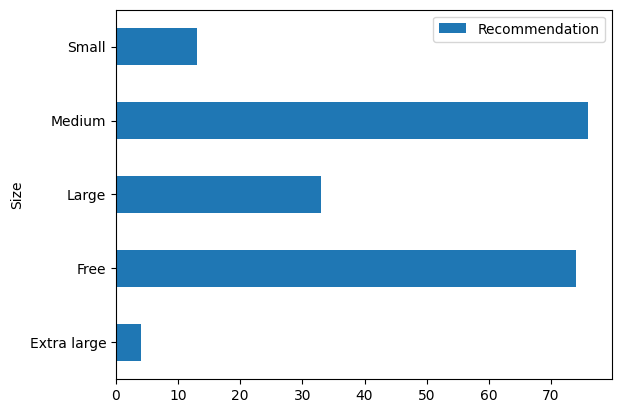

In [392]:
inp0.groupby(by='Size')[['Recommendation']].sum().plot.barh()
plt.show()

### Multivariate analysis 

Which of the following pair of “Style” and “Price” category has the highest average of positive recommendations?
- Price: medium and style: vintage
- Price: medium and style: cute
- Price: very high and style: party
- Price: low and style: sexy


In [395]:
# plot the heat map of Style, price and Recommendation.
grid_res = pd.pivot_table(data=inp0, index='Style', columns='Price', values='Recommendation')
grid_res

Price,Average,High,Low,Medium,very-high
Style,,,,,
Brief,0.333333,NaN,0.000000,NaN,NaN
Casual,0.345455,0.666667,0.379310,0.666667,0.500000
Others,0.375000,NaN,NaN,0.500000,NaN
Sexy,0.344828,0.000000,0.500000,0.000000,0.000000
bohemian,0.333333,NaN,0.666667,1.000000,1.000000
cute,0.400000,0.666667,0.500000,1.000000,NaN
party,0.647059,0.333333,NaN,0.800000,0.823529
sexy,0.500000,NaN,0.750000,0.000000,NaN
vintage,0.352941,0.000000,0.250000,0.500000,NaN


In [399]:
#get center value
inp0.Recommendation.mean()

0.423728813559322

<Axes: xlabel='Price', ylabel='Style'>

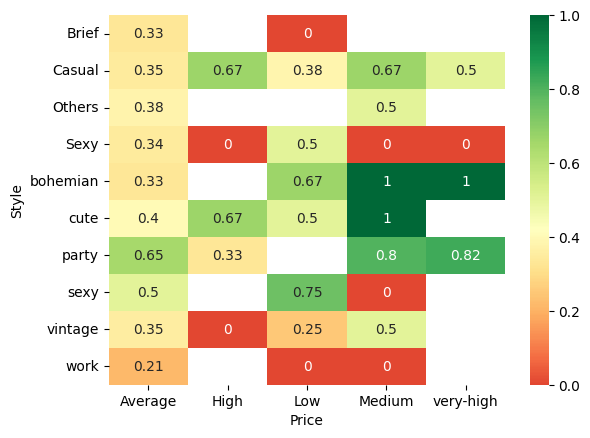

In [398]:
sns.heatmap(grid_res, annot=True, cmap='RdYlGn', center=.42)

ans: Medium Cute

Which of the following material type has no recommendation in summer and winter seasons?
- Mix and Milksilk
- Nylon and Rayon
- Microfiber and Silk
- Milksilk and Microfiber


In [408]:
# plot the heat map of Season, material and Recommendation.
grid_res2 = pd.pivot_table(data=inp0, index='Material', columns='Season', values='Recommendation')
grid_res2

Season,Autumn,Spring,Summer,Winter
Material,,,,
Missing,0.428571,0.657143,0.454545,0.481481
Others,0.000000,0.500000,0.142857,0.400000
chiffonfabric,0.500000,0.600000,0.125000,0.000000
cotton,0.294118,0.576923,0.383562,0.500000
microfiber,NaN,1.000000,0.000000,0.000000
milksilk,1.000000,NaN,0.000000,0.000000
mix,NaN,0.500000,0.333333,0.200000
nylon,0.000000,0.333333,1.000000,0.333333
polyster,0.266667,0.571429,0.071429,0.360000


<Axes: xlabel='Season', ylabel='Material'>

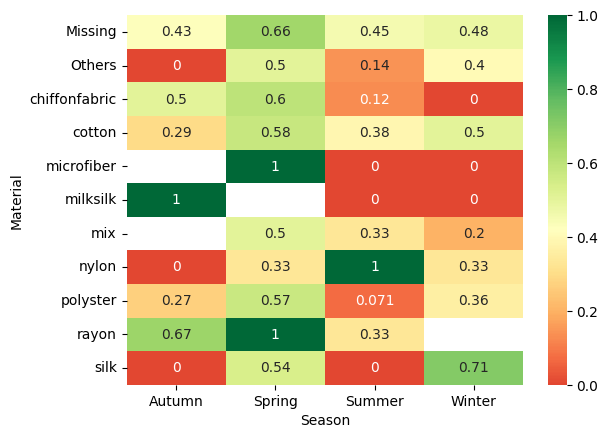

In [409]:
sns.heatmap(grid_res2, annot=True, cmap='RdYlGn', center=.42)

ans: Microfiber and Milksilk